[https://colab.research.google.com/drive/18PUo69_NjWuWMy7uenpDHLqj8KmAs_l9?authuser=2#scrollTo=3vUXPjDe1j_i](https://colab.research.google.com/drive/18PUo69_NjWuWMy7uenpDHLqj8KmAs_l9?authuser=2#scrollTo=3vUXPjDe1j_i)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Colab 進行 matplotlib 繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-08-21 12:58:27--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.142.138, 74.125.142.101, 74.125.142.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rfn0ltet2mcncgi1rso5482npm1tjgus/1692622650000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=60bae5d7-1111-410d-ba42-89e72de92e14 [following]
--2023-08-21 12:58:32--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rfn0ltet2mcncgi1rso5482npm1tjgus/1692622650000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=60bae5d7-1111-410d-ba42-89e72de92e14
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 108.177.98.132, 2607:f8b0:400e:c06::84
Connecting to doc-0k

In [4]:
data_df = pd.read_csv('/content/drive/MyDrive/2023_DA_military/dispPtV2_20AUG.csv')

# Utils

In [5]:
## 建立 table: 人名對應其所屬 banner
person_of_banner = data_df.iloc[:,0:2].drop_duplicates()

# Data overview

In [6]:
data_df.iloc[0:2,]

,Banner,Person,Era,YoE,Loc1st,Loc2nd,Section,Page,text,Loc,lat,lon,year
0,鑲黃旗,楊名高,崇德,七年,塔山,['諸臺'],八旗通志初集卷之一百七十三名臣列傳三十三,4210,崇德七年，任牛彔章京，隨固山額真劉之源征明圍錦州，擊敗山口敵兵。又用紅衣炮攻克塔山城，並收附...,塔山,40.821941,120.935895,1642
1,鑲黃旗,楊名高,崇德,七年,杏山,['諸臺'],八旗通志初集卷之一百七十三名臣列傳三十三,4210,崇德七年，任牛彔章京，隨固山額真劉之源征明圍錦州，擊敗山口敵兵。又用紅衣炮攻克塔山城，並收附...,杏山,40.951450,121.081665,1642


## 資料數量

In [7]:
print(data_df.shape)

(570, 13)


## Select the columns of interest

In [8]:
# select interesting variables without coordinates (10,11)
column_names = data_df.columns
column_names_select = column_names[[0,1,2,9,12]]
print(column_names_select)


Index(['Banner', 'Person', 'Era', 'Loc', 'year'], dtype='object')


## Number of distinct(unique) values

In [9]:
# how many unique values in an intresting column
for column_name in column_names_select:
  num_unique_values = data_df[column_name].nunique()
  print(f"{column_name}:{num_unique_values}")


Banner:8
Person:124
Era:3
Loc:32
year:17


## Distribution of 'Banner'

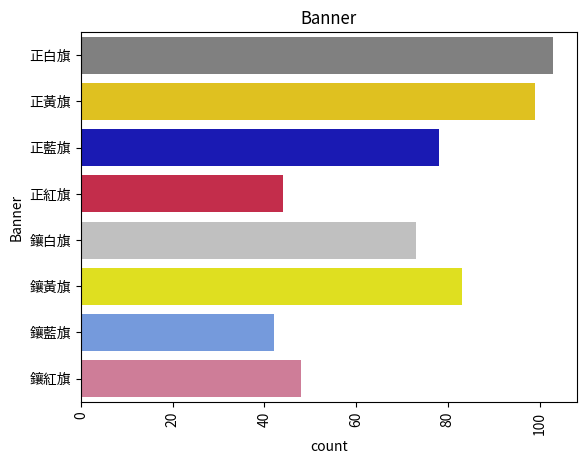

In [10]:
column_name = 'Banner'
order = ['正白旗', '正黃旗', '正藍旗', '正紅旗', '鑲白旗', '鑲黃旗', '鑲藍旗', '鑲紅旗']
custom_palette = {'正白旗': 'gray', '正黃旗': 'Gold', '正藍旗': 'MediumBlue', '正紅旗': 'crimson',
                  '鑲白旗': 'silver', '鑲黃旗': 'yellow', '鑲藍旗': 'cornflowerblue', '鑲紅旗': 'Palevioletred'}


column_counts = data_df[column_name].value_counts().reset_index() # reset_index: 把 index 變成 column
column_counts.columns = ['Banner', 'count']

sns.barplot(x='count', y='Banner', data=column_counts, order = order, orient='h', palette = custom_palette)
plt.title(column_name)
plt.xticks(rotation='vertical')
plt.show()

## Distribution of 'Banner' and 'Era'

In [11]:
df = data_df[['Banner', 'Era']]

# 使用 groupby 按年份和 Banner 分组，计算筆數
banner_era_counts = df.groupby(['Era', 'Banner']).size().reset_index()
banner_era_counts = banner_era_counts.fillna(0) # NaN 補 0

# assign column names (不知為第三個欄位是0何無法直接修改)
banner_era_counts.rename(columns=lambda x: f'Count_{x}', inplace=True)
banner_era_counts.columns = ['Era','Banner','count']

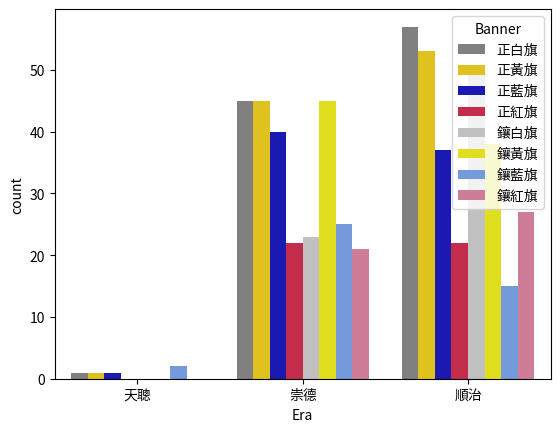

In [12]:


sns.barplot(data=banner_era_counts, x='Era', y='count', hue='Banner', hue_order = order, palette = custom_palette)
plt.show()


## Time series of 'Banner'

In [13]:
# df = data_df[['Banner', 'year']]

# # 使用 groupby 按年份和 Banner 分组，计算筆數
# banner_year_counts = df.groupby(['year', 'Banner']).size().unstack()
# banner_year_counts = banner_year_counts.fillna(0) # NaN 補 0

# # 绘制折线图展示每个班级随着年份变化的人数
# ax = banner_year_counts.plot(kind='line', marker='o', figsize=(10, 6))
# ax.set_xlabel('Year')
# ax.set_ylabel('Count')
# ax.set_title('Banner Counts Over Years')
# ax.legend(title='Banner')
# plt.show()



In [14]:
df = data_df[['Banner', 'year']]

banner_year_counts = df.groupby(['year', 'Banner']).size()
banner_year_counts = banner_year_counts.fillna(0) # NaN 補 0
banner_year_counts = banner_year_counts.reset_index()

# assign column names (不知為第三個欄位是0何無法直接修改)
banner_year_counts.rename(columns=lambda x: f'Count_{x}', inplace=True)
banner_year_counts.columns = ['year','banner','count']

df = banner_year_counts
# 创建包含所有可能 year 和 banner 组合的数据框
# all_years = df['year'].unique()
all_years = np.arange(1630,1657)
all_banners = df['banner'].unique()
all_combinations = pd.MultiIndex.from_product([all_years, all_banners], names=['year', 'banner'])
all_data = pd.DataFrame(index=all_combinations).reset_index()

# 将两个数据框合并，并填充缺失的 count 为 0
merged_df = all_data.merge(df, on=['year', 'banner'], how='left').fillna(0)


<Axes: xlabel='year', ylabel='count'>

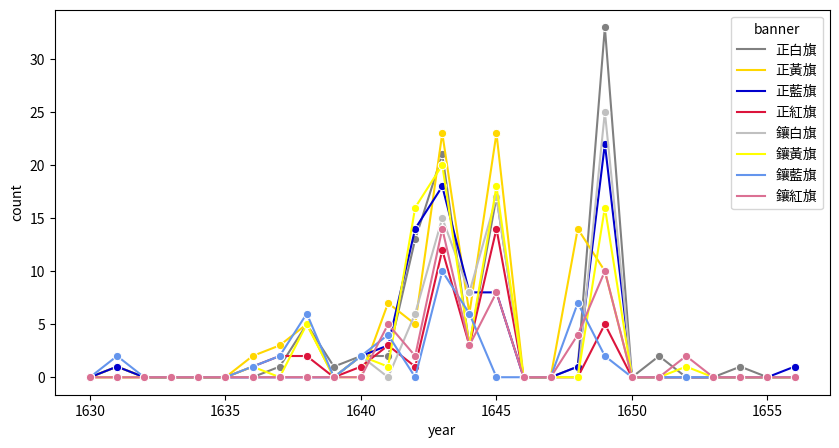

In [15]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=merged_df, x='year', y='count', hue='banner', marker='o', hue_order = order, palette = custom_palette)

## 有無 person 屬於多個banner? no

In [16]:
df_group = data_df[['Banner', 'Person']].groupby(['Person', 'Banner']).size().reset_index()
df_group.duplicated(subset=['Person', 'Banner']).any()

False

# 年資

In [17]:
df_sort = data_df.sort_values(by='year')
# df_sort = df_sort[['year','Person']]
df_sort['seniority'] = df_sort.groupby('Person').cumcount() + 1
df_sort = df_sort[['Banner', 'Person', 'year','seniority']]
df_sort

,Banner,Person,year,seniority
288,鑲藍旗,墨爾根轄李國翰,1631,1
226,正藍旗,佟養性,1631,1
499,正白旗,何智機理,1631,1
482,正黃旗,張成德,1631,1
302,鑲藍旗,劉光弼,1631,1
...,...,...,...,...
174,鑲紅旗,金礪,1652,4
63,鑲黃旗,阿什圖,1652,4
193,鑲紅旗,吳汝玠,1652,4
151,正白旗,胡弘先,1654,4


In [18]:
banner_yr_app_counts = df_sort.groupby(['year', 'Banner', 'seniority']).size().reset_index()


In [19]:

# assign column names (不知為第三個欄位是0何無法直接修改)
banner_yr_app_counts.rename(columns=lambda x: f'Count_{x}', inplace=True)
banner_yr_app_counts.columns = ['year','Banner','seniority', 'count']
banner_yr_app_counts

,year,Banner,seniority,count
0,1631,正白旗,1,1
1,1631,正藍旗,1,1
2,1631,正黃旗,1,1
3,1631,鑲藍旗,1,2
4,1636,正紅旗,1,1
...,...,...,...,...
291,1651,正白旗,8,1
292,1652,鑲紅旗,4,2
293,1652,鑲黃旗,4,1
294,1654,正白旗,4,1


## All

<Figure size 1000x1000 with 0 Axes>

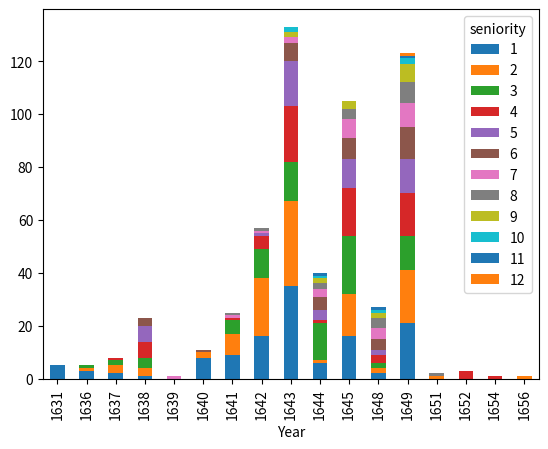

In [21]:
df = banner_yr_app_counts.sort_values(by='year')

# 使用 pivot_table 将数据重塑为适合绘制堆叠条形图的形式
pivot_df = df.pivot_table(index='year', columns='seniority', values='count', aggfunc='sum', fill_value=0)



# 绘制堆叠条形图
# plt.figure(figsize=(12, 4))
fig = plt.figure(figsize=(10, 10))
sns.set_palette("tab10")  # 使用默认颜色方案
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel('Year')
# plt.ylabel(selected_banner)
# plt.title()
plt.legend(title='seniority')
plt.show()
# plt.savefig(f'seniority_{one_banner}.png')


## Each banner

<Figure size 1000x1000 with 0 Axes>

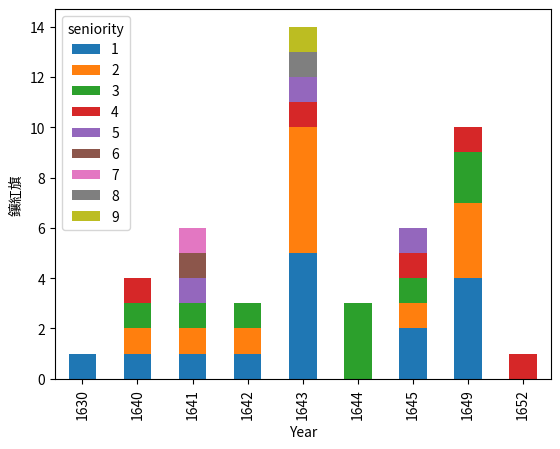

<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

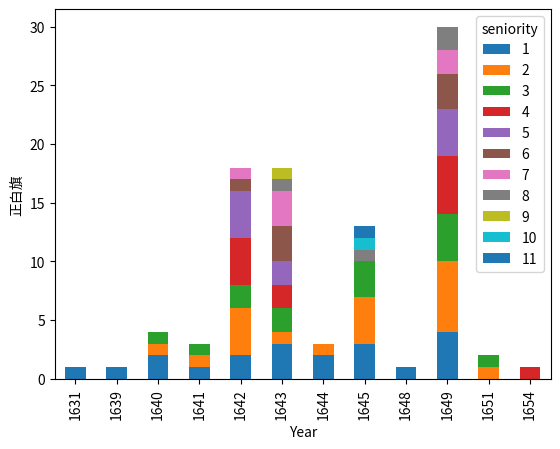

<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

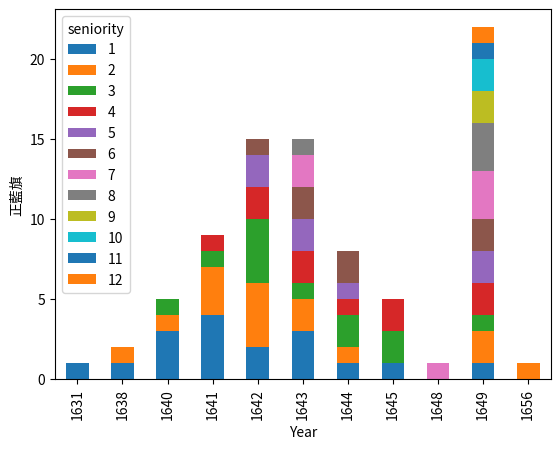

<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

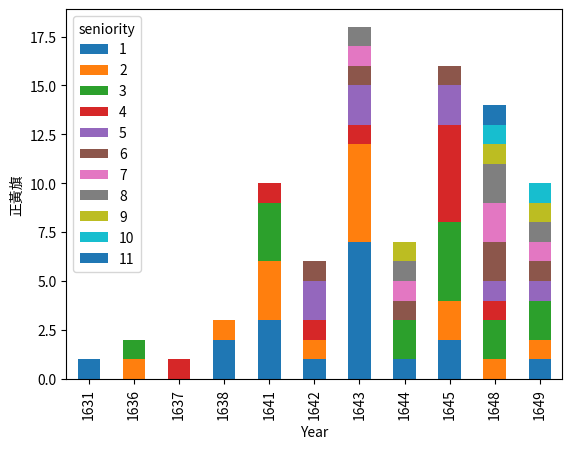

<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

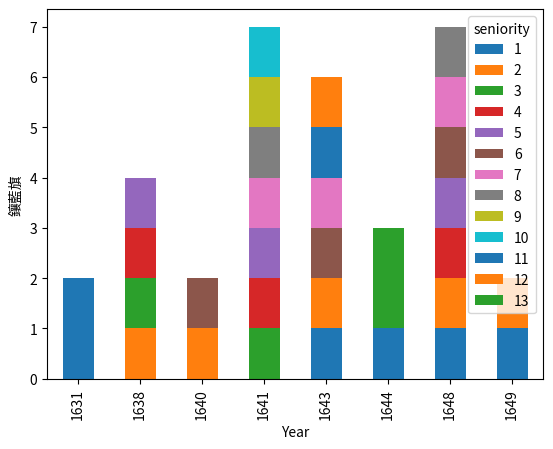

<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

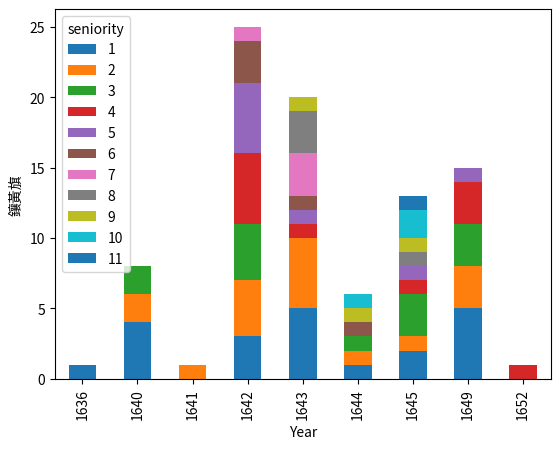

<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

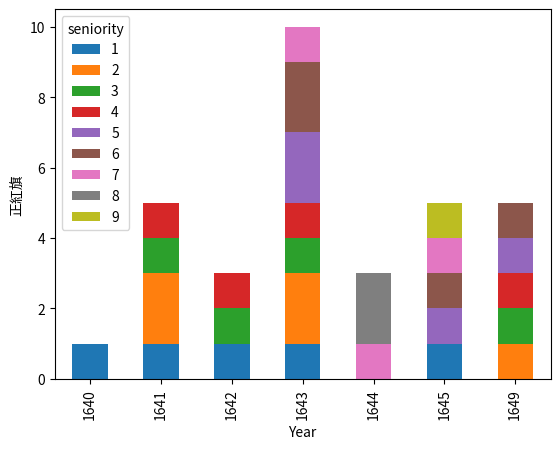

<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

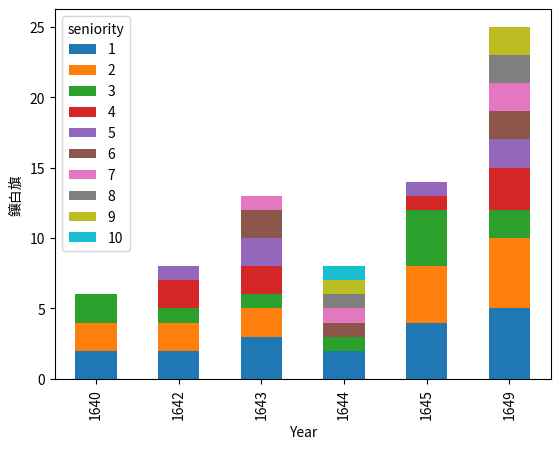

<Figure size 640x480 with 0 Axes>

In [ ]:
all_banners = banner_yr_app_counts['Banner'].unique()
for one_banner in all_banners:

  # 选择特定 'Banner' 值的所有行
  selected_banner = one_banner
  df = banner_yr_app_counts[banner_yr_app_counts['Banner'] == selected_banner]
  df = df.sort_values(by='year')

  # 使用 pivot_table 将数据重塑为适合绘制堆叠条形图的形式
  pivot_df = df.pivot_table(index='year', columns='seniority', values='count', aggfunc='sum', fill_value=0)



  # 绘制堆叠条形图
  # plt.figure(figsize=(12, 4))
  fig = plt.figure(figsize=(10, 10))
  sns.set_palette("tab10")  # 使用默认颜色方案
  pivot_df.plot(kind='bar', stacked=True)
  plt.xlabel('Year')
  plt.ylabel(selected_banner)
  # plt.title()
  plt.legend(title='seniority')
  plt.show()
  plt.savefig(f'seniority_{one_banner}.png')
